In [2]:
### STEPS ###
# 1. Data Download and preprocessing
# 2. Model building
# 3. Training the model
# 4. Testing the model and showing the performance measures
# 5. Showing the results graphically
#
# In this competition, we are given sales for 34 months and are asked to 
# predict total sales for every product and store in the next month. I have 
# picked one single shop (shop_id =2) for simplicity to predict sales for this 
# example.
# Reference link: https://towardsdatascience.com/python-sales-forecasting-kaggle-competition-40726b2ee047
#############

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# datatset loading
training_set_path = "./Datasets/train.csv"
df = pd.read_csv(training_set_path)

# take all the entries where shop id is 2 and delete the shop id column and the item ids
shop =  df[df['shop_id']==2]
shop.drop('item_id', inplace = True, axis = 1)
shop.drop('shop_id',inplace = True, axis = 1)
shop['sales'] = shop['item_cnt_day'] * shop['item_price']
shop.drop('item_cnt_day',inplace=True,axis=1)
shop.drop('item_price',inplace=True,axis=1)

sales = shop.groupby('date_block_num').sum()

c:\users\abdur\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-3-d0755afd88ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop['sales'] = shop['item_cnt_day'] * shop['item_price']


<BarContainer object of 34 artists>

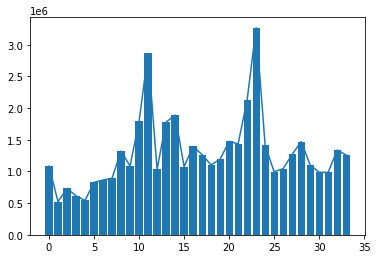

In [4]:
y = sales['sales']
x = np.arange(0,34)
plt.plot(y)
plt.bar(x,y)

In [ ]:
# grid search function
def arima(y,p,d,q):
    errors = []
    parameters=[]
    media = np.mean(y)
    for i in p:
        for j in d:
            for k in q:
                try:
                    preds = y[0:24]
                    for i in range(0,10):
                        model = ARIMA(preds, order=(i,j,k))
                        fit = model.fit()
                        pred = fit.predict(24+i,24+i,typ='levels')
                        preds = preds.append(pred)
                    error = mean_absolute_error(y,preds)
                    errors.append(error)
                    parameters.append([i,j,k])
                except:
                    pass
    index = errors.index(min(errors))
    parameters = parameters[index]
    return 'the optimal (p,d,q) values are %s with MAE:  %s' % (parameters[index],errors[index])
  
# I type in the values I want to try  
p = [1,2,3,4,6,8]
d = [0,1,2,3]
q = [0,1,2,3]

# Run my function
arima(y,p,d,q)

c:\users\abdur\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\abdur\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


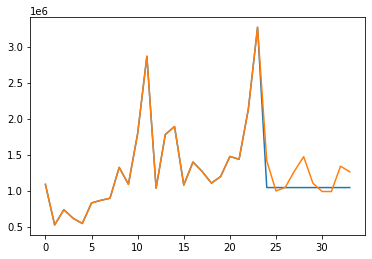

In [10]:
preds = y[0: 24]
arima_model = ARIMA(y, order = (2,0,1))
fit = arima_model.fit()

for i in range(0,10):
    pred = fit.predict(24+1, 24+1, typ='levels')
    preds = preds.append(pred)
    
plt.plot(np.arange(0,34), preds, y)